In [79]:
import pydicom

In [80]:
def extract_dicom_metadata(file_path):
    try:
        # Load the DICOM file with force=True to handle files without the standard header
        dicom_file = pydicom.dcmread(file_path, force=True)
        
        # Extract specific metadata
        patient_id = dicom_file.get('PatientID', 'Unknown')
        birth_date = dicom_file.get('PatientBirthDate', 'Unknown')
        study_date = dicom_file.get('StudyDate', 'Unknown')
        sex = dicom_file.get('PatientSex', 'Unknown')
        
        # Return the extracted metadata
        return {
            "Patient ID": patient_id,
            "Birth Date": birth_date,
            "Study Date": study_date,
            "Sex": sex
        }
    except Exception as e:
        return {"Error": f"An error occurred while reading the DICOM file: {str(e)}"}

Example usage:

In [81]:
file_path = r"C:\Users\acer\Desktop\Data\57-2014\47-4881 2014-9 L dicom\_Z\SLZ+000.dcm"
metadata = extract_dicom_metadata(file_path)
print(metadata)

{'Patient ID': '474881', 'Birth Date': '19650325', 'Study Date': '20140925', 'Sex': 'F'}


Iterate through data

In [82]:
import os
import pandas as pd

metadata_list = []

# Base directory containing the 'Data' folder
base_directory = r"C:\Users\acer\Desktop\Data"

# Loop through each year folder
for year_folder in os.listdir(base_directory):
    year_folder_path = os.path.join(base_directory, year_folder)
    
    # Check if it's a directory
    if os.path.isdir(year_folder_path):
        # Loop through each patient folder in the year folder
        for patient_folder in os.listdir(year_folder_path):
            patient_folder_path = os.path.join(year_folder_path, patient_folder)
            
            # Check if it's a directory
            if os.path.isdir(patient_folder_path):
                # Path to the _Z folder
                z_folder_path = os.path.join(patient_folder_path, '_Z')
                
                # Check if _Z folder exists
                if os.path.isdir(z_folder_path):
                    dcm_file_path = os.path.join(z_folder_path, 'SLZ+000.dcm')
                    
                    # Check if the DCM file exists
                    if os.path.isfile(dcm_file_path):
                        # Apply the function to the DCM file
                        metadata = extract_dicom_metadata(dcm_file_path)
                        if metadata:
                            metadata_list.append(metadata)

PatientDF = pd.DataFrame(metadata_list)

In [83]:
import pandas as pd

PatientDF = pd.DataFrame(metadata_list)
PatientDF['Birth Date'] = pd.to_datetime(PatientDF['Birth Date'], format='%Y%m%d', errors='coerce')
PatientDF['Study Date'] = pd.to_datetime(PatientDF['Study Date'], format='%Y%m%d', errors='coerce')

PatientDF

,Patient ID,Birth Date,Study Date,Sex
0,474881,1965-03-25,2014-09-25,F
1,474881,1965-03-25,2014-09-25,F
2,5421497,1991-05-05,2014-05-12,F
3,5421497,1991-05-05,2014-05-12,F
4,5710397,1963-10-09,2015-10-03,F
...,...,...,...,...
359,66700362,1985-12-10,2023-07-03,F
360,66700404,1966-05-07,2023-08-26,F
361,66700404,1966-05-07,2023-08-26,F
362,66700681,1968-07-23,2023-11-16,M


In [84]:
PatientDF['Age at Study'] = (PatientDF['Study Date'] - PatientDF['Birth Date']).dt.days // 365

In [89]:
sex_counts = PatientDF['Sex'].value_counts()
print(sex_counts)

Sex
F    317
M     47
Name: count, dtype: int64


In [93]:
PatientDF

,Patient ID,Birth Date,Study Date,Sex,Age at Study
0,474881,1965-03-25,2014-09-25,F,49.0
1,474881,1965-03-25,2014-09-25,F,49.0
2,5421497,1991-05-05,2014-05-12,F,23.0
3,5421497,1991-05-05,2014-05-12,F,23.0
4,5710397,1963-10-09,2015-10-03,F,52.0
...,...,...,...,...,...
359,66700362,1985-12-10,2023-07-03,F,37.0
360,66700404,1966-05-07,2023-08-26,F,57.0
361,66700404,1966-05-07,2023-08-26,F,57.0
362,66700681,1968-07-23,2023-11-16,M,55.0


In [86]:
Patient_grouped = PatientDF.groupby('Patient ID')

In [87]:
Patient_grouped.head()

,Patient ID,Birth Date,Study Date,Sex,Age at Study
0,474881,1965-03-25,2014-09-25,F,49.0
1,474881,1965-03-25,2014-09-25,F,49.0
2,5421497,1991-05-05,2014-05-12,F,23.0
3,5421497,1991-05-05,2014-05-12,F,23.0
4,5710397,1963-10-09,2015-10-03,F,52.0
...,...,...,...,...,...
359,66700362,1985-12-10,2023-07-03,F,37.0
360,66700404,1966-05-07,2023-08-26,F,57.0
361,66700404,1966-05-07,2023-08-26,F,57.0
362,66700681,1968-07-23,2023-11-16,M,55.0


In [88]:
PatientDF['Age at Study'].describe()

count    362.000000
mean      44.602210
std       18.117554
min        0.000000
25%       28.000000
50%       48.000000
75%       60.000000
max       83.000000
Name: Age at Study, dtype: float64

In [90]:
import matplotlib.pyplot as plt

In [97]:
filtered_ages = PatientDF['Age at Study'][PatientDF['Age at Study'].notna() & (PatientDF['Age at Study'] != 0)]

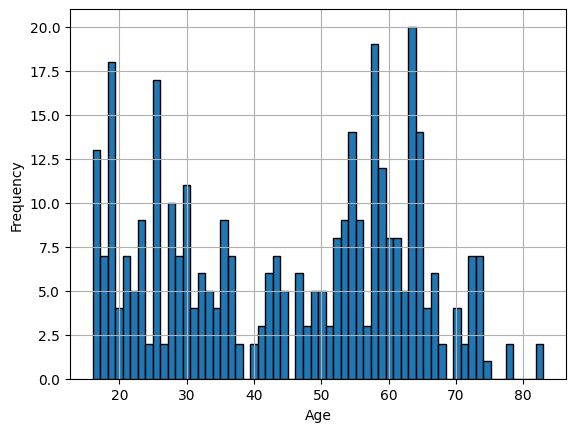

In [105]:
# Plotting the histogram for the 'Age' column
filtered_ages.hist(bins=60, edgecolor='black')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()
